<a href="https://colab.research.google.com/github/Sudesh8/Sentiment-Analysis/blob/main/sentimentDataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import torch


In [2]:
#importando o dataset
df = pd.read_csv(r"/content/sentiment.csv")



In [3]:
df.describe()

,Unnamed: 0
count,53043.000000
mean,26521.000000
std,15312.339501
min,0.000000
25%,13260.500000
50%,26521.000000
75%,39781.500000
max,53042.000000


In [4]:
df1 = df.copy()


In [5]:
df1.dropna(inplace = True)
df1.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [6]:
df1.shape

(52681, 3)

In [7]:
df1 = df.drop(df.columns[0], axis=1)


In [8]:
df1.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB


In [10]:
df1.isnull().sum()


,0
statement,362
status,0


In [11]:
df1[df1.isnull().any(axis=1)]


,statement,status
293,NaN,Anxiety
572,NaN,Anxiety
595,NaN,Anxiety
1539,NaN,Normal
2448,NaN,Normal
...,...,...
52838,NaN,Anxiety
52870,NaN,Anxiety
52936,NaN,Anxiety
53010,NaN,Anxiety


In [12]:
df1 = df1.dropna()


In [13]:
df1

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [14]:
df1['statement_len'] = df1['statement'].apply(lambda x: len(x.split(' ')))

In [15]:
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
Index: 52681 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   statement      52681 non-null  object
 1   status         52681 non-null  object
 2   statement_len  52681 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB
None


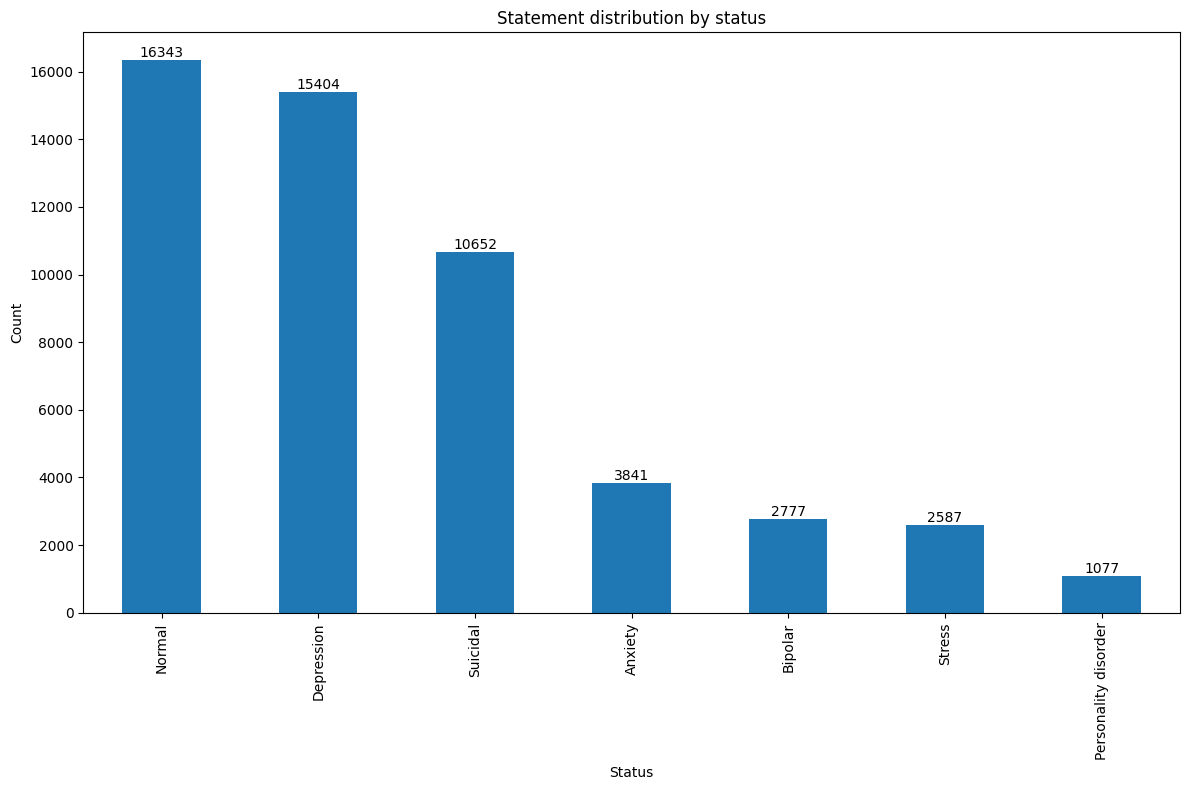

In [16]:
plt.figure(figsize=(12,8))

# get the unique status values and their counts
status_counts = df1['status'].value_counts()

# create the bar plot
ax = status_counts.plot(kind='bar')

# add the count labels on top of each bar
for i, v in enumerate(status_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Statement distribution by status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [17]:
# Cleaning the corpus

def clean_text(text):
    '''
    Comprehensively clean text by making it lowercase, removing various patterns,
    links, punctuation, and words containing numbers.
    '''
    # Convert to string and lowercase
    text = str(text).lower()

    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove URLs (including markdown-style links)
    text = re.sub(r'https?://\S+|www\.\S+|\[.*?\]\(.*?\)', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>+', '', text)

    # Remove handles (that start with '@')
    text = re.sub(r'@\w+', '', text)

    # Remove punctuation and other special characters
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)

    # Remove newline characters
    text = re.sub(r'\n', ' ', text)

    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

In [18]:
df2 = df1.copy()

In [19]:

df2['statement_clean'] = df2['statement'].apply(clean_text)
df2.head()

,statement,status,statement_len,statement_clean
0,oh my gosh,Anxiety,3,oh my gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10,trouble sleeping confused mind restless heart ...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14,all wrong back off dear forward doubt stay in ...
3,I've shifted my focus to something else but I'...,Anxiety,11,ive shifted my focus to something else but im ...
4,"I'm restless and restless, it's been a month n...",Anxiety,14,im restless and restless its been a month now ...


In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

In [21]:
nltk.download('stopwords')  # Download the stopwords list
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
stop_words = stopwords.words('english')

In [23]:
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

In [25]:
df2['statement_clean'] = df2['statement_clean'].apply(remove_stopwords)
df2.head()

,statement,status,statement_len,statement_clean
0,oh my gosh,Anxiety,3,oh gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10,trouble sleeping confused mind restless heart ...
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14,wrong back dear forward doubt stay restless re...
3,I've shifted my focus to something else but I'...,Anxiety,11,ive shifted focus something else im still worried
4,"I'm restless and restless, it's been a month n...",Anxiety,14,im restless restless month boy mean


In [26]:



# Create a SnowballStemmer object (for English)
stemmer = SnowballStemmer('english')




In [27]:
stemmer

In [28]:
def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [29]:
df2['statement_clean'] = df2['statement_clean'].apply(stemm_text)
df2.head()

,statement,status,statement_len,statement_clean
0,oh my gosh,Anxiety,3,oh gosh
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10,troubl sleep confus mind restless heart tune
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14,wrong back dear forward doubt stay restless re...
3,I've shifted my focus to something else but I'...,Anxiety,11,ive shift focus someth els im still worri
4,"I'm restless and restless, it's been a month n...",Anxiety,14,im restless restless month boy mean


In [30]:
from sklearn.preprocessing import LabelEncoder


In [31]:
l_encoder = LabelEncoder()

In [32]:
l_encoder.fit(df2['status'])


LabelEncoder()

In [33]:
df2['status_encoded'] = l_encoder.transform(df2['status'])
df2.head()

,statement,status,statement_len,statement_clean,status_encoded
0,oh my gosh,Anxiety,3,oh gosh,0
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10,troubl sleep confus mind restless heart tune,0
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14,wrong back dear forward doubt stay restless re...,0
3,I've shifted my focus to something else but I'...,Anxiety,11,ive shift focus someth els im still worri,0
4,"I'm restless and restless, it's been a month n...",Anxiety,14,im restless restless month boy mean,0


In [34]:
from nltk.tokenize import word_tokenize


In [35]:
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [36]:
df2['tokens'] = df2['statement_clean'].apply(word_tokenize)
df2.head()

,statement,status,statement_len,statement_clean,status_encoded,tokens
0,oh my gosh,Anxiety,3,oh gosh,0,"[oh, gosh]"
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10,troubl sleep confus mind restless heart tune,0,"[troubl, sleep, confus, mind, restless, heart,..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14,wrong back dear forward doubt stay restless re...,0,"[wrong, back, dear, forward, doubt, stay, rest..."
3,I've shifted my focus to something else but I'...,Anxiety,11,ive shift focus someth els im still worri,0,"[ive, shift, focus, someth, els, im, still, wo..."
4,"I'm restless and restless, it's been a month n...",Anxiety,14,im restless restless month boy mean,0,"[im, restless, restless, month, boy, mean]"


In [37]:
df2.to_csv('emotion_data.csv', index=False)


In [38]:
df2=pd.read_csv("/content/emotion_data.csv")

In [41]:
df2

,statement,status,statement_len,statement_clean,status_encoded,tokens
0,oh my gosh,Anxiety,3,oh gosh,0,"['oh', 'gosh']"
1,"trouble sleeping, confused mind, restless hear...",Anxiety,10,troubl sleep confus mind restless heart tune,0,"['troubl', 'sleep', 'confus', 'mind', 'restles..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14,wrong back dear forward doubt stay restless re...,0,"['wrong', 'back', 'dear', 'forward', 'doubt', ..."
3,I've shifted my focus to something else but I'...,Anxiety,11,ive shift focus someth els im still worri,0,"['ive', 'shift', 'focus', 'someth', 'els', 'im..."
4,"I'm restless and restless, it's been a month n...",Anxiety,14,im restless restless month boy mean,0,"['im', 'restless', 'restless', 'month', 'boy',..."
...,...,...,...,...,...,...
52676,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,322,nobodi take serious i'v dealt depressionanxiet...,0,"['nobodi', 'take', 'serious', 'i', ""'"", 'v', '..."
52677,"selfishness ""I don't feel very good, it's lik...",Anxiety,199,selfish dont feel good like dont belong world ...,0,"['selfish', 'dont', 'feel', 'good', 'like', 'd..."
52678,Is there any way to sleep better? I can't slee...,Anxiety,17,way sleep better cant sleep night med didnt help,0,"['way', 'sleep', 'better', 'cant', 'sleep', 'n..."
52679,"Public speaking tips? Hi, all. I have to give ...",Anxiety,74,public speak tip hi give present work next wee...,0,"['public', 'speak', 'tip', 'hi', 'give', 'pres..."
